# TrafficSignClassification

In [32]:
import  matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle 
import random
import os

# Loading the data as train, test & valadition.

In [33]:
#import train data
with open('data/train.p', 'rb') as f:
    train_data = pickle.load(f)
    
with open('data/valid.p', 'rb') as f:
    val_data = pickle.load(f)
with open('data/test.p', 'rb') as f:
    test_data = pickle.load(f)
    


In [34]:
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [35]:
print("Training data features shape",X_train.shape,"lables",y_train.shape)
print("Test data features  shape",X_test.shape,"lables",y_test.shape)
print("validation features data shpe",X_val.shape,"lables",y_val.shape)

Training data features shape (34799, 32, 32, 3) lables (34799,)
Test data features  shape (12630, 32, 32, 3) lables (12630,)
validation features data shpe (4410, 32, 32, 3) lables (4410,)


# Visualising the data

(32, 32, 3)


35

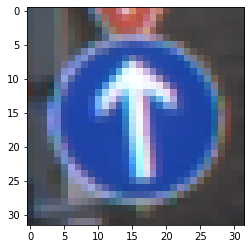

In [36]:
i=np.random.randint(1,len(X_train))
plt.imshow(X_train[i])
print(X_train[i].shape)
y_train[i]

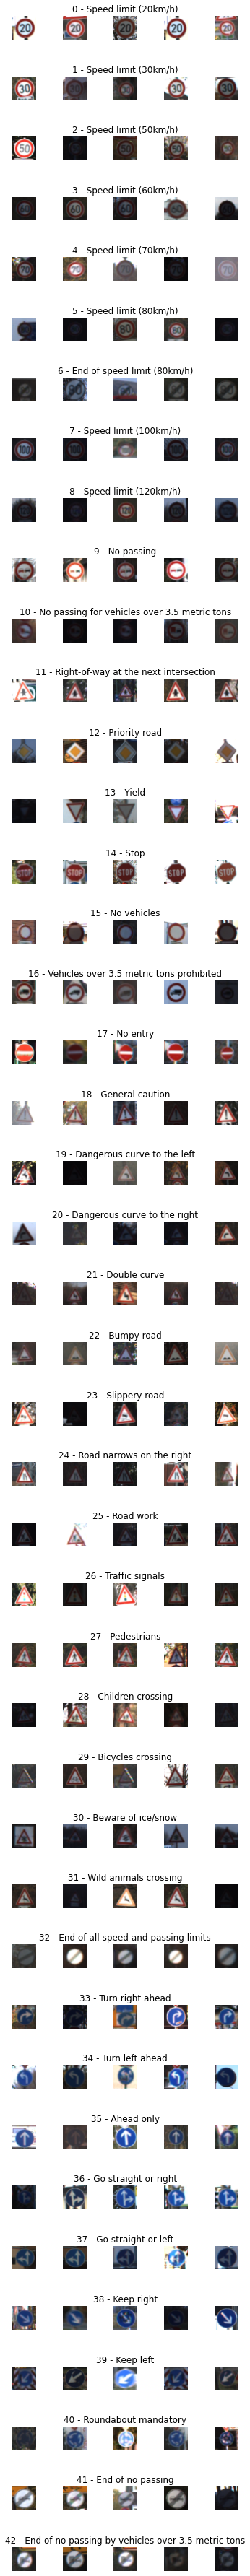

In [37]:
data = pd.read_csv('signnames.csv')
num_of_samples=[]
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
 
for i in range(cols):
    for j, row in data.iterrows():
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j) + " - " + row["SignName"])
        num_of_samples.append(len(x_selected))


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


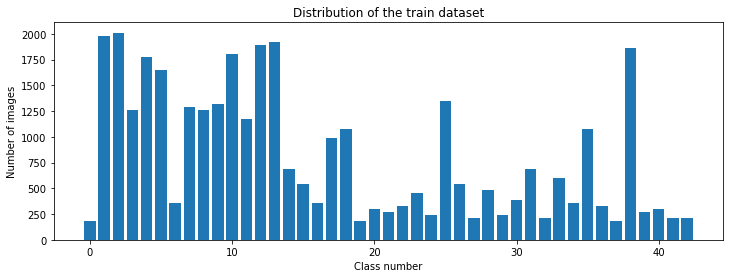

In [38]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()



(34799, 32, 32, 3)


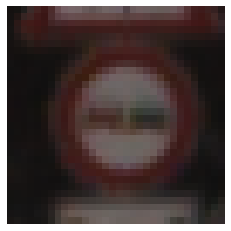

In [39]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)


(32, 32, 3)
36


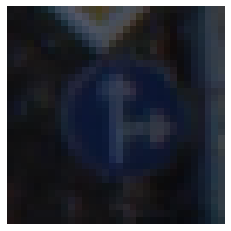

In [40]:
import cv2
 
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])


In [41]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img



(32, 32)


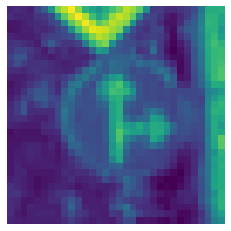

In [42]:
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)


In [43]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img


(32, 32)


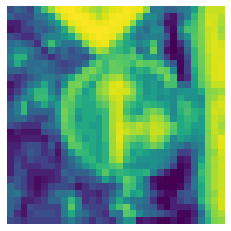

In [44]:
img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)


In [45]:
def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img


In [46]:
X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))


(34799, 32, 32)


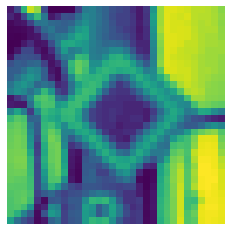

In [51]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)


In [52]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)


In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)


In [56]:
datagen.fit(X_train)
batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)


(15, 32, 32, 1)


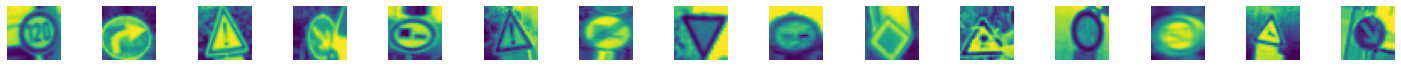

In [59]:
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")
 
print(X_batch.shape)



In [61]:
from tensorflow.keras import utils as np_utils

In [63]:
y_train = np_utils.to_categorical(y_train, 43)
y_test = np_utils.to_categorical(y_test, 43)
y_val = np_utils.to_categorical(y_val, 43)


# MODEL CREATION -LENET

In [78]:
def modified_model():
  model = Sequential()
  model.add(layers.Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(layers.Conv2D(60, (5, 5), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  
  model.add(layers.Conv2D(30, (3, 3), activation='relu'))
  model.add(layers.Conv2D(30, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  
  model.add(layers.Flatten())
  model.add(layers.Dense(500, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(43, activation='softmax'))
  
  model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [79]:
from tensorflow.keras import layers,datasets,models


In [80]:
model = modified_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 480)              

In [81]:
history = model.fit(X_train, y_train, batch_size=50, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
696/696 [==============================] - 243s 349ms/step - loss: 0.8727 - accuracy: 0.7547 - val_loss: 0.1958 - val_accuracy: 0.9383
Epoch 2/10
696/696 [==============================] - 228s 327ms/step - loss: 0.1452 - accuracy: 0.9558 - val_loss: 0.1543 - val_accuracy: 0.9624
Epoch 3/10
696/696 [==============================] - 231s 332ms/step - loss: 0.0886 - accuracy: 0.9732 - val_loss: 0.1208 - val_accuracy: 0.9628
Epoch 4/10
696/696 [==============================] - 229s 329ms/step - loss: 0.0689 - accuracy: 0.9786 - val_loss: 0.1353 - val_accuracy: 0.9644
Epoch 5/10
696/696 [==============================] - 231s 332ms/step - loss: 0.0542 - accuracy: 0.9824 - val_loss: 0.1086 - val_accuracy: 0.9701
Epoch 6/10
696/696 [==============================] - 228s 328ms/step - loss: 0.0466 - accuracy: 0.9858 - val_loss: 0.0693 - val_accuracy: 0.9807
Epoch 7/10
696/696 [==============================] - 233s 335ms/step - loss: 0.0395 - accuracy: 0.9873 - val_loss: 0.1386 -

Text(0.5, 0, 'epoch')

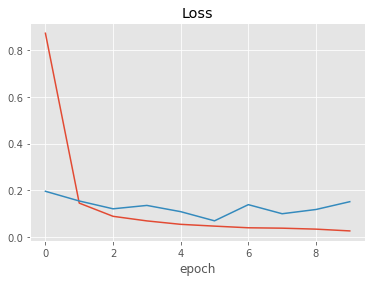

In [113]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')


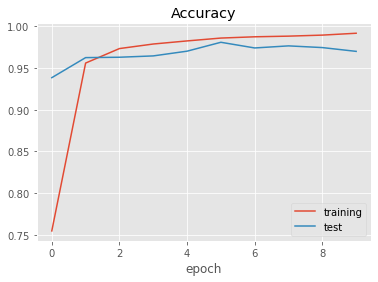

In [115]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.style.use('ggplot')


In [99]:
score=model.evaluate(X_test,y_test)

395/395 [==============================] - 20s 51ms/step - loss: 0.2292 - accuracy: 0.9508


In [100]:
score

[0.2292414903640747, 0.9508313536643982]

In [101]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [102]:
accuracy=history.history['accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
val_accuracy=history.history['val_accuracy']

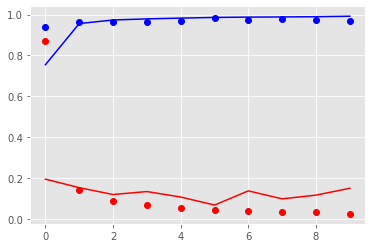

In [103]:
epochs=range(len(accuracy))
plt.plot(epochs,loss,'ro',label="Training Loss")
plt.plot(epochs,val_loss,'r',label="validation Loss")
plt.plot(epochs, val_accuracy,'bo',label="validation accuracy")
plt.plot(epochs,accuracy,'b',label="accuracy")
plt.savefig('graph')

In [117]:
predicted_classes=model.predict_classes(X_test)
predicted_classes[0]

16

In [125]:
y_true=y_test

TypeError: Invalid shape (32, 32, 1) for image data

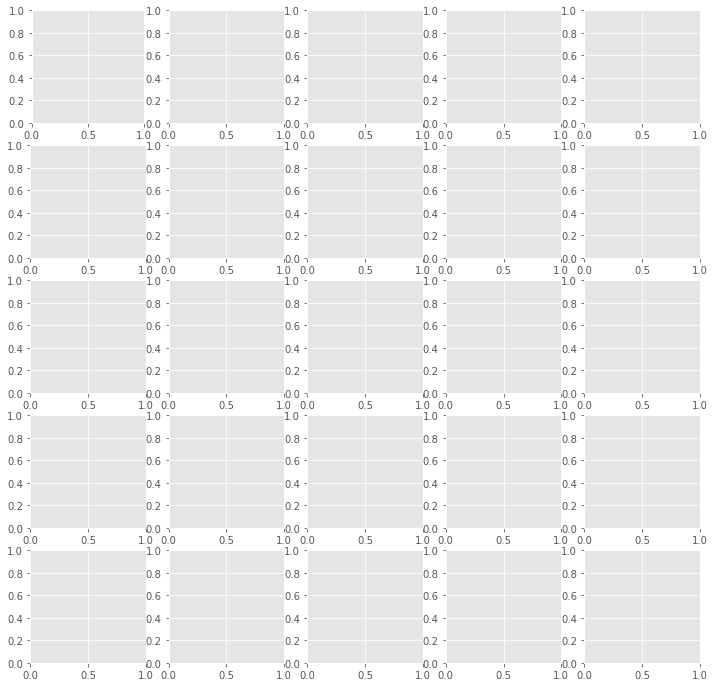

In [111]:
l=5
w=5
fig,axes=plt.subplots(l,w,figsize=(12,12))
axes=axes.ravel()
for i in np.arange(0,l*w):
  axes[i].imshow(X_test[i])
  axes[i].set_title('prediction-{}\n  True-{}'.format(predicted_classes[i],y_true[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)
